In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [59]:
df = pd.read_csv('iranian-telecom-churn.csv')

In [60]:
df.head()

,ID,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Tariff plan,Status,Age group,Complaints,Churn
0,1,35,0,1420,41,36,20,1,A,Active,30-40,N,0
1,2,28,0,920,32,20,12,7,A,Active,Under 30,N,0
2,3,40,0,88,6,8,6,0,A,Inactive,30-40,N,1
3,4,38,0,13963,170,9,47,9,A,Active,30-40,N,0
4,5,38,0,13773,169,0,44,7,A,Active,30-40,N,0


In [61]:
df.drop('ID',axis=1,inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Subscription length      3150 non-null   int64 
 1   Charge amount            3150 non-null   int64 
 2   Seconds of use           3150 non-null   int64 
 3   Frequency of use         3150 non-null   int64 
 4   Frequency of SMS         3150 non-null   int64 
 5   Distinct called numbers  3150 non-null   int64 
 6   Call failures            3150 non-null   int64 
 7   Tariff plan              3150 non-null   object
 8   Status                   3150 non-null   object
 9   Age group                3150 non-null   object
 10  Complaints               3150 non-null   object
 11  Churn                    3150 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 295.4+ KB


In [63]:
df.describe()

,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,7.627937,0.157143
std,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,7.263886,0.363993
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,1.000000,0.000000
50%,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,6.000000,0.000000
75%,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,12.000000,0.000000
max,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,36.000000,1.000000


In [64]:
df.isnull().sum()

Subscription length        0
Charge amount              0
Seconds of use             0
Frequency of use           0
Frequency of SMS           0
Distinct called numbers    0
Call failures              0
Tariff plan                0
Status                     0
Age group                  0
Complaints                 0
Churn                      0
dtype: int64

In [65]:
df.head()

,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Tariff plan,Status,Age group,Complaints,Churn
0,35,0,1420,41,36,20,1,A,Active,30-40,N,0
1,28,0,920,32,20,12,7,A,Active,Under 30,N,0
2,40,0,88,6,8,6,0,A,Inactive,30-40,N,1
3,38,0,13963,170,9,47,9,A,Active,30-40,N,0
4,38,0,13773,169,0,44,7,A,Active,30-40,N,0


In [ ]:
label = LabelEncoder()
df['Status'] = label.fit_transform(df['Status'])
df['Tariff plan'] = label.fit_transform(df['Tariff plan'])
df['Complaints'] = label.fit_transform(df['Complaints'])
df['Age group'] = df['Age group'].apply(lambda x: 2 if x=='30-40' else 1 if x=='Under 30' else 3)

In [67]:
X = df.drop('Churn',axis=1)
y = df['Churn']

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y,test_size=0.2,random_state=39)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,y_train_valid,test_size=0.2,random_state=39)

In [68]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [69]:
model = keras.Sequential([
    keras.layers.Dense(1024,activation='relu',input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1,activation='softmax')
])

c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1024)           │        12,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 406,785 (1.55 MB)

 Trainable params: 406,785 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(optimizer=keras.optimizers.SGD(),loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [72]:
model_chack_point = ModelCheckpoint(filepath='model.keras',save_best_only=True)
early = EarlyStopping(patience=10,restore_best_weights=True)

In [73]:
hist = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_valid,y_valid),callbacks=[model_chack_point,early])

Epoch 1/100


c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1447 - loss: 0.6304 - val_accuracy: 0.1845 - val_loss: 0.5341
Epoch 2/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0625 - loss: 0.4516

c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1495 - loss: 0.4826 - val_accuracy: 0.1845 - val_loss: 0.4602
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1468 - loss: 0.4068 - val_accuracy: 0.1845 - val_loss: 0.4148
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1400 - loss: 0.3554 - val_accuracy: 0.1845 - val_loss: 0.3819
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1410 - loss: 0.3251 - val_accuracy: 0.1845 - val_loss: 0.3545
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1403 - loss: 0.2940 - val_accuracy: 0.1845 - val_loss: 0.3310
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1394 - loss: 0.2756 - val_accuracy: 0.1845 - val_loss: 0.3111
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1452 - loss: 0.2608 - val_accuracy: 0.1845 - val_loss: 0.2950
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1469 - loss: 0.2472 - val_accuracy: 0.1845 - val_loss: 0.2

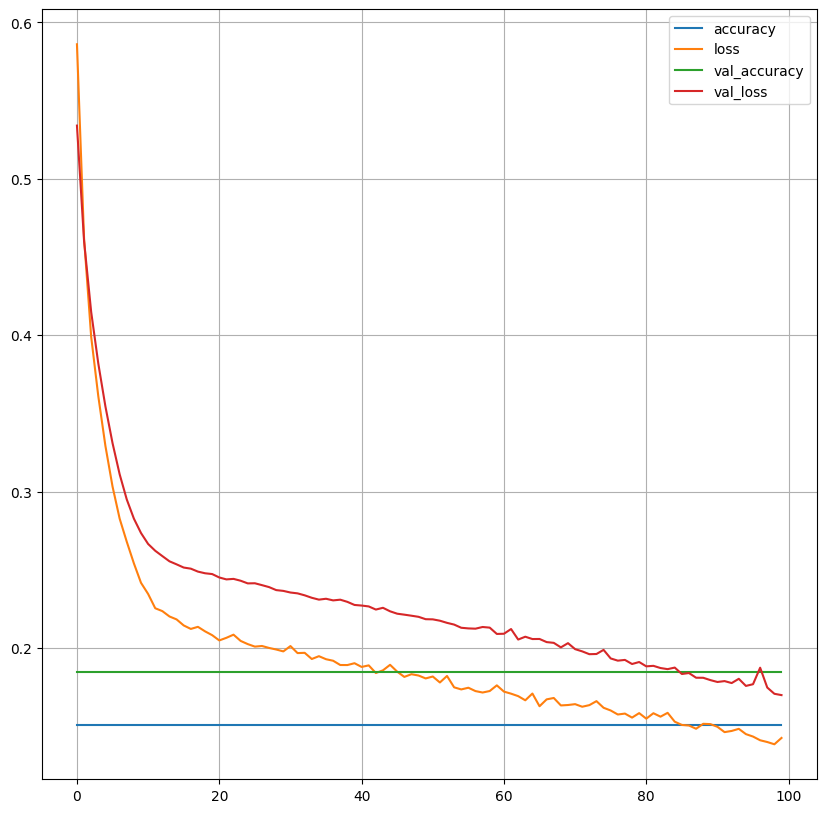

In [74]:
pd.DataFrame(hist.history).plot(figsize=(10,10))
plt.grid()
plt.savefig('model_evaluate.png')
plt.show()

In [75]:
y_pred = model.predict(X_test,verbose=0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       532
           1       0.16      1.00      0.27        98

    accuracy                           0.16       630
   macro avg       0.08      0.50      0.13       630
weighted avg       0.02      0.16      0.04       630



c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

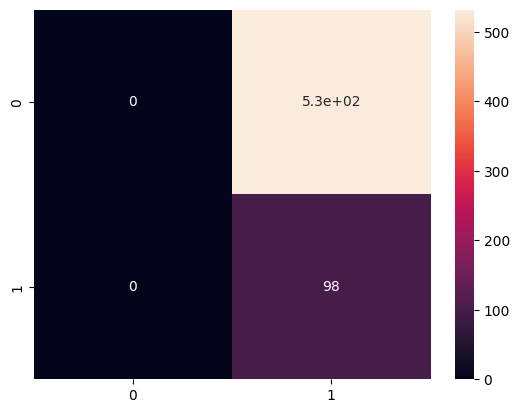

In [76]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()